## Chapter 12 - k-Nearest Neighbors

### The Model Requires:
+ Some notion of distance
+ An assumption that points that are close to one another are similar.

In [1]:
import math
import random
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))
def sum_of_squares(v):
    return dot(v, v)
def magnitude(v):
    return math.sqrt(sum_of_squares(v))
def distance(v, w):
    return magnitude(vector_subtract(v, w))

In [3]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [4]:
best_thing_in_the_world = [ 'dog', 'cat', 'candy', 'cat', 'dog', 'cat', 'candy', 'cat', 'candy','candy', 'dog', 'cat', 'candy', 'cat', 'candy']

In [5]:
raw_majority_vote(best_thing_in_the_world)

'candy'

### In case of tie, reduce $k$ until we find a unique winner

In [6]:
def majority_votes(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    
    if num_winners == 1:
        return winner
    else:
        return majority_votes(labels[:-1])

In [7]:
# Notice that the raw counter does not catch the tie between cat and candy. 
# Majority_votes reduces list until there is one winner
print(majority_votes(best_thing_in_the_world))
print(raw_majority_vote(best_thing_in_the_world))

cat
candy


In [8]:
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""
    
    # order the labled points from nearest to farthest
    by_distance = sorted(labeled_points, key = lambda point: distance(point[0], new_point))
    
    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    # and let them vote
    return majority_votes(k_nearest_labels)

In [9]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]


### Time to plot State Borders

In [10]:
import re
    
segments = []
points = []
    
lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""
    
with open('states.txt', 'r') as f:
    lines = [line for line in f]
    
for line in lines:   
    if line.startswith('</state>'):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []    
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))       
        
def plot_state_borders(plt, color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

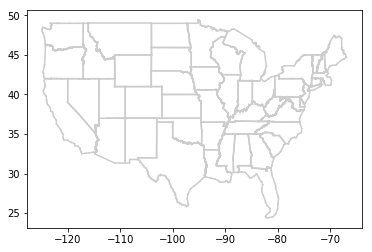

In [11]:
# Test Complete!
plot_state_borders(plt)

In [12]:
# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

In [13]:
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }

In [14]:
for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

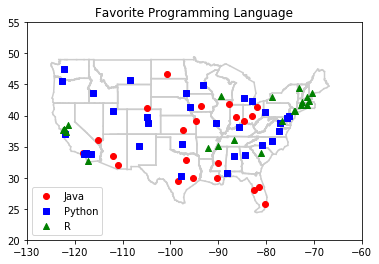

In [15]:
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language], label=language, zorder=10)
plot_state_borders(plt)

plt.legend(loc=0)      # let's matplotlib choose the location
plt.axis([-130, -60, 20, 55])

plt.title("Favorite Programming Language")
plt.show()

In [16]:
# try several different values for k
for k in [1, 2, 3, 4, 5, 6, 7]:
    num_correct = 0
    
    for city in cities:
        location, actual_language = city
        other_cities = [other_city for other_city in cities if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location)
        
        if predicted_language == actual_language:
            num_correct += 1
            
    print(k, "neighbors[s]:", num_correct, "correct out of", len(cities))

1 neighbors[s]: 40 correct out of 75
2 neighbors[s]: 40 correct out of 75
3 neighbors[s]: 44 correct out of 75
4 neighbors[s]: 44 correct out of 75
5 neighbors[s]: 41 correct out of 75
6 neighbors[s]: 33 correct out of 75
7 neighbors[s]: 35 correct out of 75


In [17]:
plots_2 = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

In [18]:
def knn_programming_language_usa(k):

    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)
            
    plt.figure(num=None, figsize=(8, 6), dpi=140, facecolor='w', edgecolor='k')
    
    for language, (x, y) in plots.items():
        plt.scatter(x, y, s=3, color=colors[language], marker=markers[language], label=language, zorder=10)
        plot_state_borders(plt)

    l = plt.legend(loc=0)      # let's matplotlib choose the location
    l.set_zorder(20)
    plt.axis([-130, -60, 20, 55])

    plt.title(str(k) + "-Nearest Neighbor Favorite Programming Language")
    plt.show()        

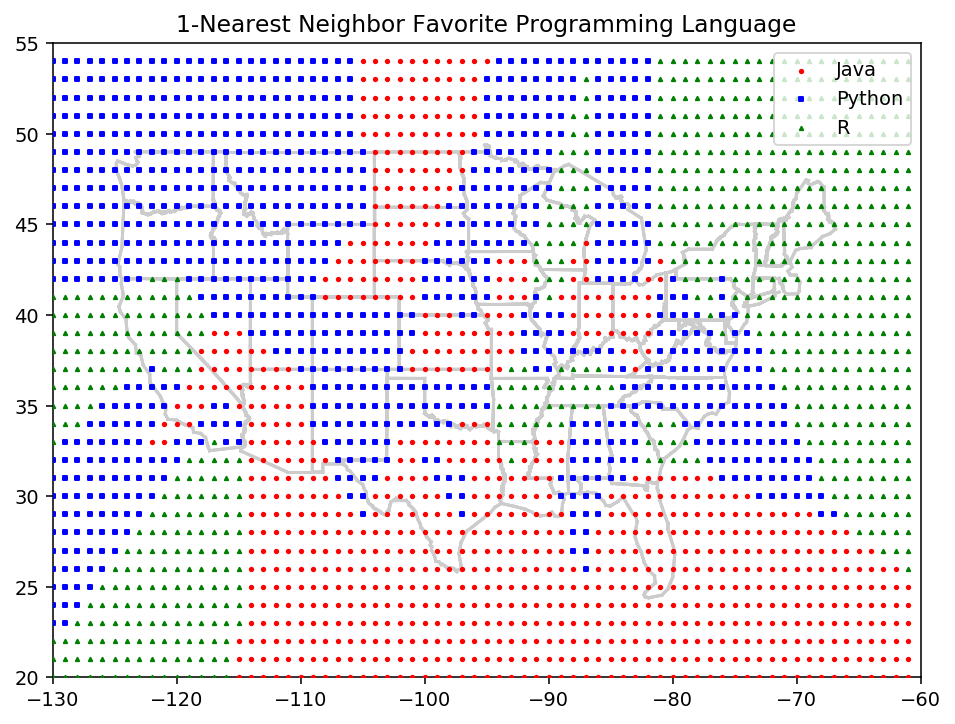

In [19]:
knn_programming_language_usa(1)

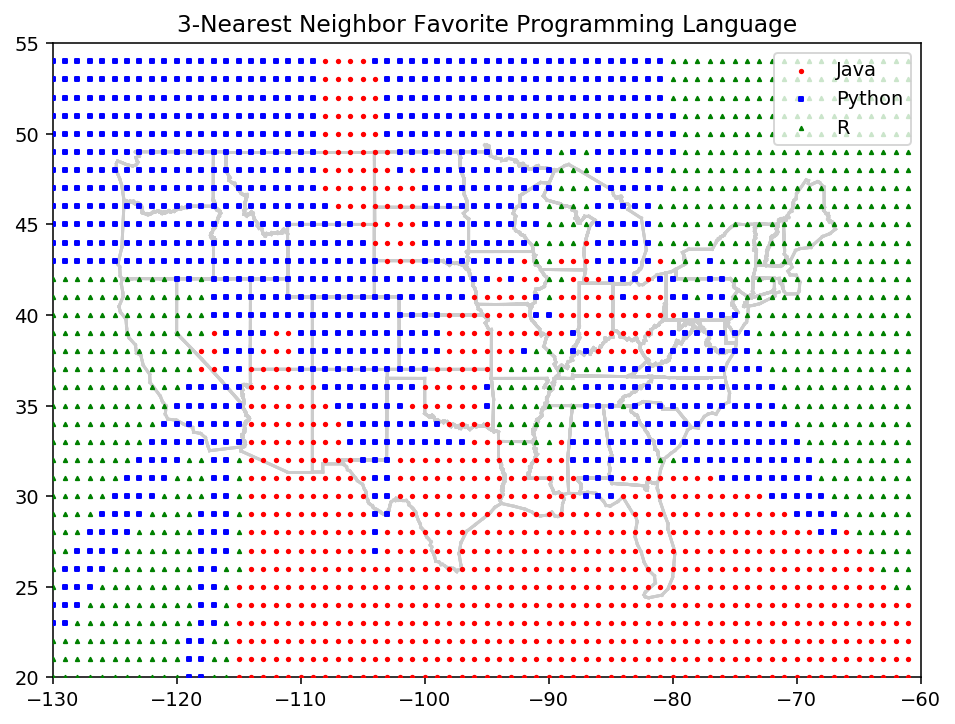

In [20]:
knn_programming_language_usa(3)

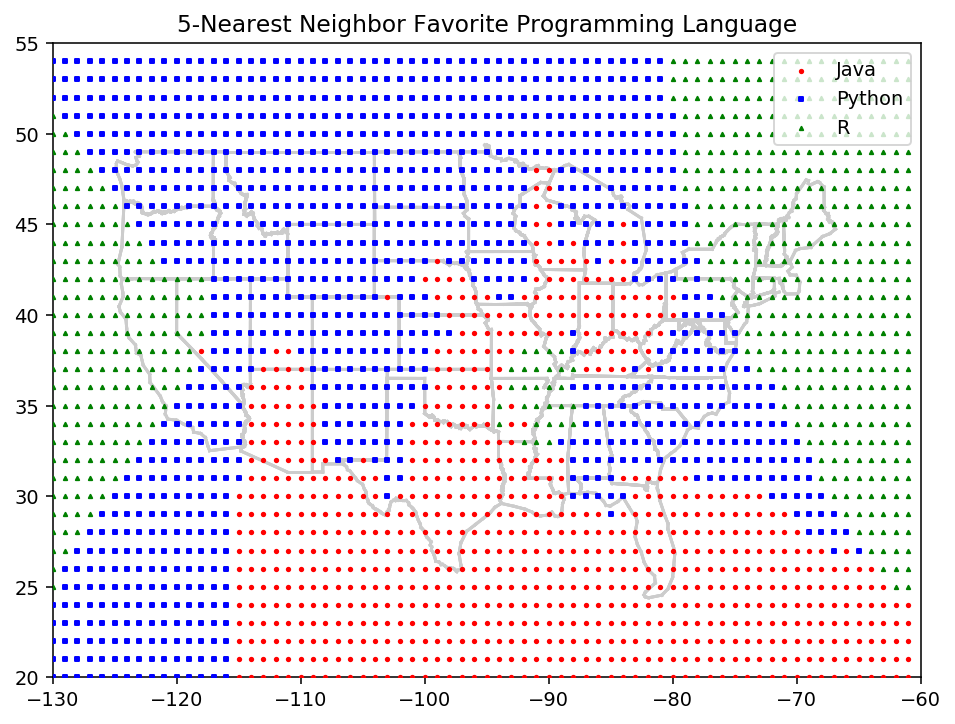

In [21]:
knn_programming_language_usa(5)

In [22]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

In [23]:
def random_distance(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range (num_pairs)]

In [24]:
dimensions = range(1, 101)

avg_distance = []
min_distance = []

random.seed(0)
for dim in dimensions:
    distances = random_distance(dim, 10000)
    avg_distance.append(np.mean(distances))
    min_distance.append(min(distances))

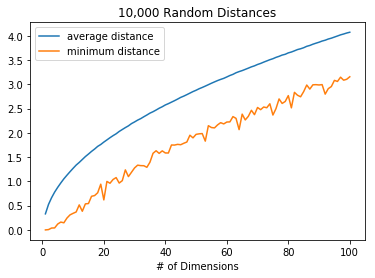

In [26]:
plt.plot(dimensions, avg_distance, label='average distance')
plt.plot(dimensions, min_distance, label='minimum distance')
plt.title('10,000 Random Distances')
plt.xlabel('# of Dimensions')
plt.legend(loc=0)
plt.show()

In [27]:
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distance, avg_distance)]

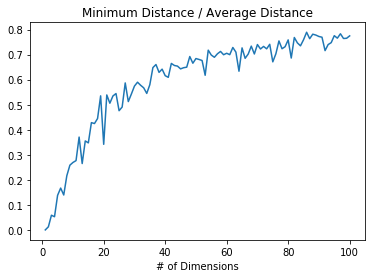

In [28]:
plt.plot(dimensions, min_avg_ratio)
plt.title('Minimum Distance / Average Distance')
plt.xlabel('# of Dimensions')
plt.show()

In [29]:
random50 = [random.random() for _ in range(50)]

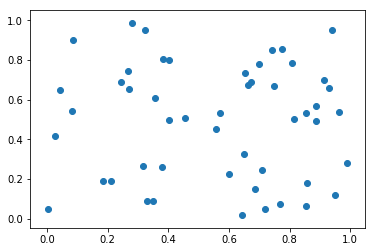

In [30]:
random50_2_a = [random.random() for _ in range(50)]
random50_2_b = [random.random() for _ in range(50)]

plt.scatter(random50_2_a, random50_2_b)